# Artificial Neural Network

## Example 1: Housing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../data/kc_house_data.csv")
df.head(n=3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
df.drop(["id", "date"], axis=1, inplace=True)

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
selected_features = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "sqft_basement",
    "sqft_above",
    "floors",
    "yr_built",
]

X = df[selected_features]
y = df["price"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1, activation="linear"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="Adam", loss="mean_squared_error")

In [12]:
epochs_hist = model.fit(
    X_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.2
)

Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 425210937344.0000 - val_loss: 397531873280.0000
Epoch 2/100
277/277 [==============================] - 0s 2ms/step - loss: 423460110336.0000 - val_loss: 393916907520.0000
Epoch 3/100
277/277 [==============================] - 0s 2ms/step - loss: 416940883968.0000 - val_loss: 384241106944.0000
Epoch 4/100
277/277 [==============================] - 0s 2ms/step - loss: 403363004416.0000 - val_loss: 366866726912.0000
Epoch 5/100
277/277 [==============================] - 1s 2ms/step - loss: 381727866880.0000 - val_loss: 341524709376.0000
Epoch 6/100
277/277 [==============================] - 0s 2ms/step - loss: 352444940288.0000 - val_loss: 309321498624.0000
Epoch 7/100
277/277 [==============================] - 0s 2ms/step - loss: 317010018304.0000 - val_loss: 272031989760.0000
Epoch 8/100
277/277 [==============================] - 1s 2ms/step - loss: 277755756544.0000 - val_loss: 232604270592.0000
Epoch 9/100
277/

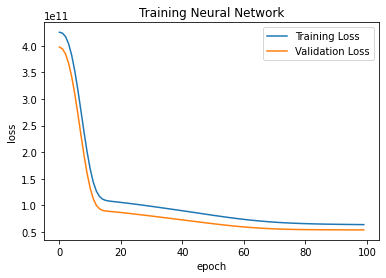

In [13]:
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])
plt.title("Training Neural Network")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["Training Loss", "Validation Loss"]);

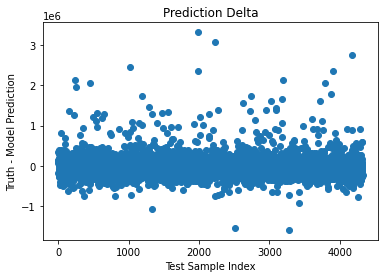

In [14]:
predictions = model.predict(X_test_scaled)
delta = y_test - predictions.reshape(-1)

plt.scatter(range(len(delta)), delta)
plt.xlabel("Test Sample Index")
plt.ylabel("Truth - Model Prediction")
plt.title("Prediction Delta");

In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R2:", r2)

R2: 0.5131195973064498


### Ways to improve/change model:

- Use dropout layers
- Change selected features
- Measure correlation between features and target
- Make model larger
- Change activations

In [16]:
from keras.layers import Dropout

In [17]:
X = df.drop(["price"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

sc = MinMaxScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
model = Sequential()
model.add(Dense(100, input_dim=X_train_scaled.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="linear"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1900      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer="Adam", loss="mean_squared_error")

In [21]:
epochs_hist = model.fit(
    X_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.2
)

Epoch 1/100
277/277 [==============================] - 1s 4ms/step - loss: 424464973824.0000 - val_loss: 394207756288.0000
Epoch 2/100
277/277 [==============================] - 1s 4ms/step - loss: 409464209408.0000 - val_loss: 363779096576.0000
Epoch 3/100
277/277 [==============================] - 1s 3ms/step - loss: 358418841600.0000 - val_loss: 293185060864.0000
Epoch 4/100
277/277 [==============================] - 1s 3ms/step - loss: 273225318400.0000 - val_loss: 201204006912.0000
Epoch 5/100
277/277 [==============================] - 1s 4ms/step - loss: 186174144512.0000 - val_loss: 126505213952.0000
Epoch 6/100
277/277 [==============================] - 1s 4ms/step - loss: 131132817408.0000 - val_loss: 91346018304.0000
Epoch 7/100
277/277 [==============================] - 1s 3ms/step - loss: 111389491200.0000 - val_loss: 81951334400.0000
Epoch 8/100
277/277 [==============================] - ETA: 0s - loss: 104546689024.00 - 1s 3ms/step - loss: 106768744448.0000 - val_loss: 79

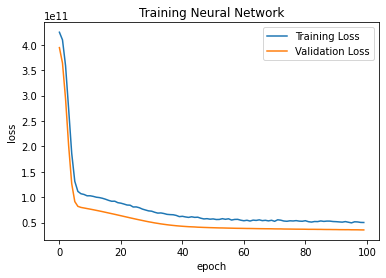

In [22]:
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])
plt.title("Training Neural Network")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["Training Loss", "Validation Loss"]);

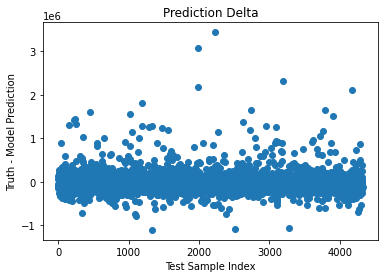

In [23]:
predictions = model.predict(X_test_scaled)
delta = y_test - predictions.reshape(-1)

plt.scatter(range(len(delta)), delta)
plt.xlabel("Test Sample Index")
plt.ylabel("Truth - Model Prediction")
plt.title("Prediction Delta");

In [24]:
r2 = r2_score(y_test, predictions)
print("R2:", r2)

R2: 0.6802620047648813
